# Decision Trees and Random Forests in Python

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
titanic = sns.load_dataset('titanic')
print(titanic.shape)
titanic.head()

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# create a small subset
df = titanic[['survived','sex', 'sibsp', 'fare']]
df['survived'] = df['survived'].apply(lambda x: 'live' if x == 0 else 'die')
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'male' else 0)
df.head()

,survived,sex,sibsp,fare
0,live,1,1,7.2500
1,die,0,1,71.2833
2,die,0,0,7.9250
3,die,0,1,53.1000
4,live,1,0,8.0500


# EDA

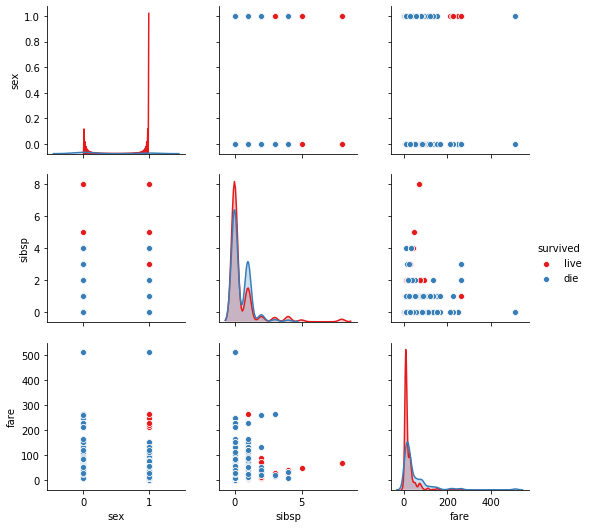

In [6]:
sns.pairplot(df, hue='survived',palette='Set1')

## Train Test Split

Let's split up the data into a training set and a test set!

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop('survived',axis=1)
y = df['survived']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

We'll start just by training a single decision tree.

In [10]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [11]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[ 65  41]
 [ 18 144]]
              precision    recall  f1-score   support

         die       0.78      0.61      0.69       106
        live       0.78      0.89      0.83       162

    accuracy                           0.78       268
   macro avg       0.78      0.75      0.76       268
weighted avg       0.78      0.78      0.77       268

0.7798507462686567


Pretty Good Result!

## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [12]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import io
import pydot 

features = list(df.columns[1:])
features

['sex', 'sibsp', 'fare']

In [13]:
dot_data = StringIO()  

export_graphviz(model, out_file=dot_data, feature_names=features)
(graph, ) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
 

FileNotFoundError: [Errno 2] "dot" not found in path.

### Now change the various model parameters (max_depth, criterion)

[[ 63  37]
 [ 20 148]]
              precision    recall  f1-score   support

         die       0.76      0.63      0.69       100
        live       0.80      0.88      0.84       168

   micro avg       0.79      0.79      0.79       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.78      0.79      0.78       268

0.7873134328358209


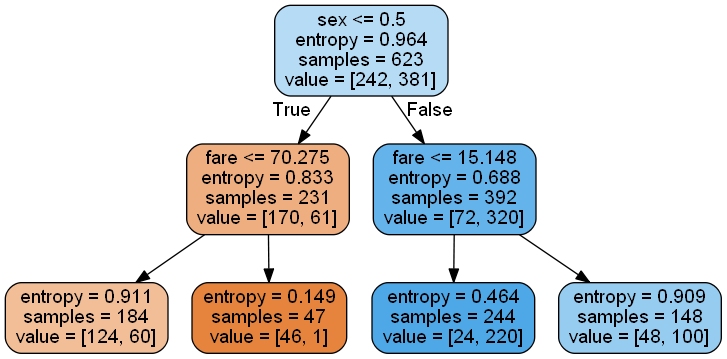

In [13]:
model = DecisionTreeClassifier(max_depth=2, criterion='entropy')
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

dot_data = StringIO()  
export_graphviz(model, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

# Random Forests

## Now let's compare the decision tree model to a random forest.

In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [15]:
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

         die       0.76      0.63      0.69       100
        live       0.80      0.88      0.84       168

   micro avg       0.79      0.79      0.79       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.78      0.79      0.78       268

0.7873134328358209
